<a href="https://colab.research.google.com/github/udaykumar-2204/Code-Alpha-_-Unemployment-Analysis-with-Python.ipynb/blob/main/Unemployment_Analysis_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [ ]:
df = pd.read_csv('/content/sample_data/Unemployment in India.csv')

df.columns = df.columns.str.strip()  # Remove extra spaces
df.dropna(inplace=True)  # Or use fillna()


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-6-b9c6864122be>:1: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['COVID_Phase'] = df['Year'].apply(lambda x: 'Pre-COVID' if x < 2020 else 'Post-COVID')


Text(0.5, 1.0, 'Monthly Unemployment Rate in India (Urban vs Rural)')

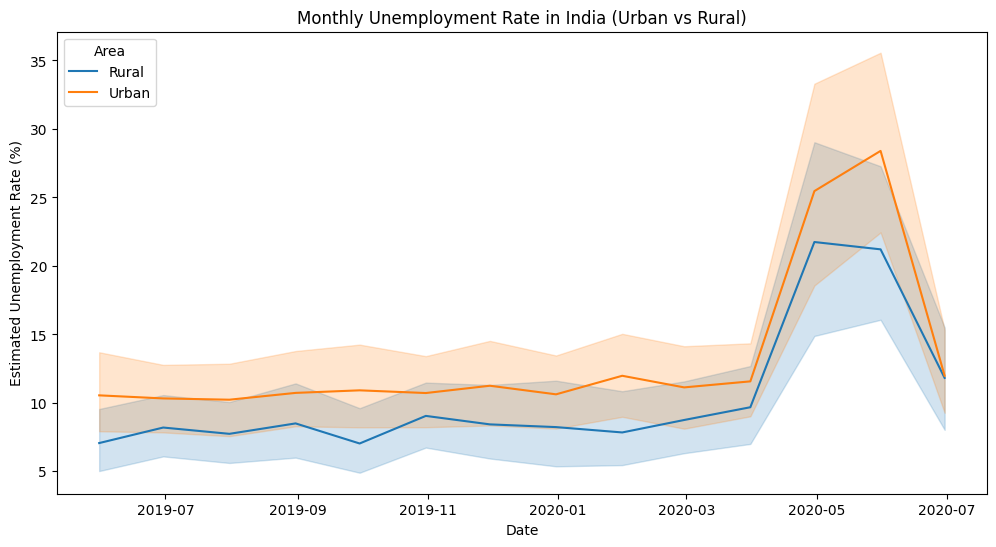

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Estimated Unemployment Rate (%)', hue='Area')
plt.title('Monthly Unemployment Rate in India (Urban vs Rural)')


<ipython-input-20-83a6af5dcf89>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='COVID_Phase', y='Estimated Unemployment Rate (%)', data=mean_rates, ax=ax, palette=['#4c72b0', '#55a868'])


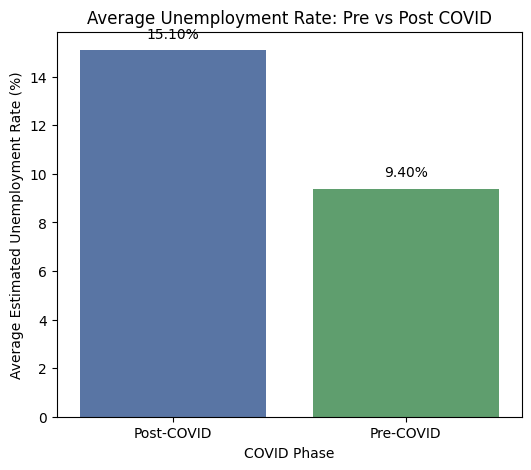

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate mean unemployment rate per COVID phase
mean_rates = df.groupby('COVID_Phase')['Estimated Unemployment Rate (%)'].mean().reset_index()

# Plot
fig, ax = plt.subplots(figsize=(6, 5))
sns.barplot(x='COVID_Phase', y='Estimated Unemployment Rate (%)', data=mean_rates, ax=ax, palette=['#4c72b0', '#55a868'])
ax.set_title('Average Unemployment Rate: Pre vs Post COVID')
ax.set_ylabel('Average Estimated Unemployment Rate (%)')
ax.set_xlabel('COVID Phase')

# Optional: show values on top of bars
for i, row in mean_rates.iterrows():
    ax.text(i, row['Estimated Unemployment Rate (%)'] + 0.5, f"{row['Estimated Unemployment Rate (%)']:.2f}%", ha='center')

plt.show()



In [ ]:
post_covid = df[df['Year'] >= 2020]
top_states = post_covid.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False)
print("Top 5 Worst-hit States:\n", top_states.head(5))
print("Top 5 Best-performing States:\n", top_states.tail(5))


Top 5 Worst-hit States:
 Region
Haryana       30.929167
Jharkhand     29.053333
Tripura       28.333333
Bihar         25.632500
Puducherry    23.840000
Name: Estimated Unemployment Rate (%), dtype: float64
Top 5 Best-performing States:
 Region
Gujarat        8.910000
Odisha         8.320000
Uttarakhand    7.720909
Assam          6.438182
Meghalaya      5.942727
Name: Estimated Unemployment Rate (%), dtype: float64


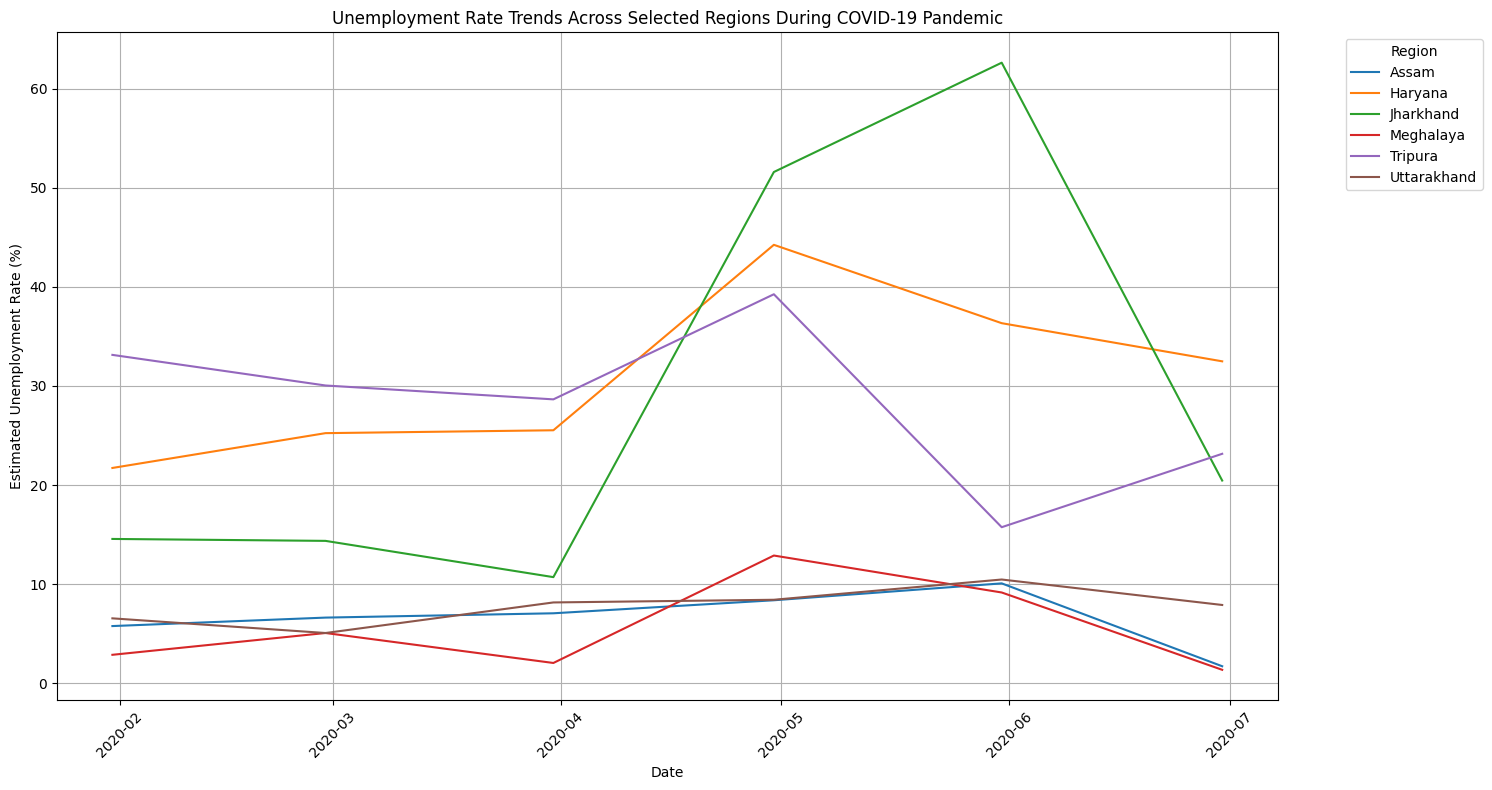

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for the post-COVID period (2020 onwards)
post_covid_df = df[df['Year'] >= 2020]

# Identify high and low performing states based on average unemployment rate during post-COVID
average_unemployment_post_covid = post_covid_df.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values()

# Select a few states (e.g., top 3 worst and bottom 3 best)
high_performing_states = average_unemployment_post_covid.head(3).index.tolist()
low_performing_states = average_unemployment_post_covid.tail(3).index.tolist()

# Combine the selected states
selected_states = high_performing_states + low_performing_states

# Filter the data to include only the selected states
selected_states_df = post_covid_df[post_covid_df['Region'].isin(selected_states)]

# Group by Region and Month, and calculate the mean unemployment rate for selected states
regional_unemployment_trend_selected = selected_states_df.groupby(['Region', 'Date'])['Estimated Unemployment Rate (%)'].mean().reset_index()

# Create a line plot to visualize the trends for selected states
plt.figure(figsize=(15, 8))
sns.lineplot(data=regional_unemployment_trend_selected, x='Date', y='Estimated Unemployment Rate (%)', hue='Region')
plt.title('Unemployment Rate Trends Across Selected Regions During COVID-19 Pandemic')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left') # Place legend outside the plot
plt.grid(True)
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

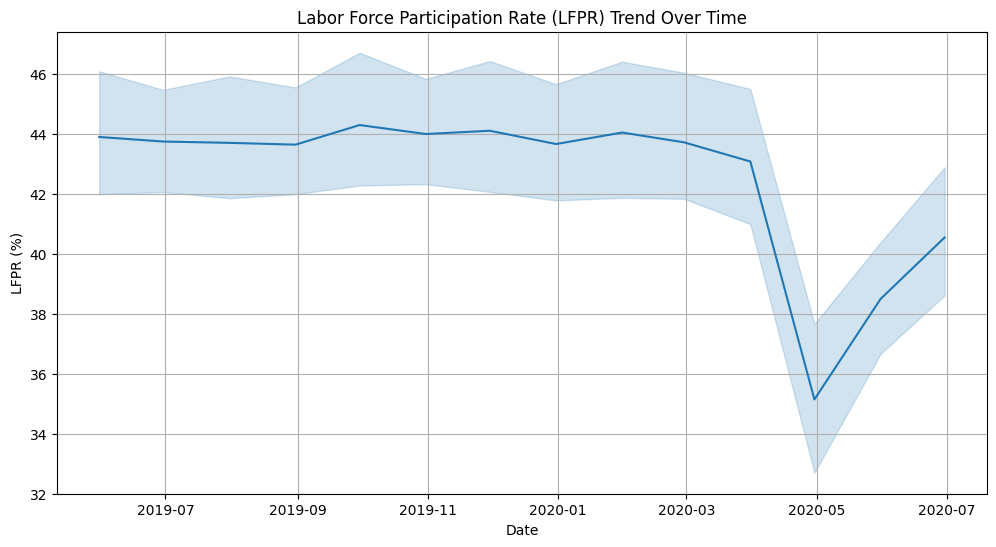

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# If Date is not datetime, convert it first
df['Date'] = pd.to_datetime(df['Date'])

# Plot LFPR trend over time (overall)
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Date', y='Estimated Labour Participation Rate (%)')
plt.title('Labor Force Participation Rate (LFPR) Trend Over Time')
plt.xlabel('Date')
plt.ylabel('LFPR (%)')
plt.grid(True)
plt.show()